In [83]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os 

# Lets move dir to where the data is stored

In [84]:
path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Epanet_python/validation_data" # mac
# path = r"C:\Users\frodi\Documents\OptimisedHeating\Epanet_python\validation_data" # windows

os.chdir(path)

print(os.listdir())

['rs_sim_flow.csv', 'VE_nedri_actual_power.csv', 'flow_values_VE_nedri.csv', 'VE_efri_actual_energy.csv', 'rjupnasalir_two_pumps_actual.csv', 'VE_pumps_sim.csv', 'VE_nedri_flow_sim.csv', 'rs_actual_flow.csv', 'rs_sim_energy.csv', 'flow_VE_efri_sim.csv', 'VE_nedri_pumps_energy_sim.csv']


# Lets load data

In [85]:
VE_nedri_flow = pd.read_csv("flow_values_VE_nedri.csv")
VE_nedri_flow = VE_nedri_flow.copy()
VE_nedri_flow = VE_nedri_flow.drop(columns=["start_time"])
VE_nedri_flow = VE_nedri_flow.rename(columns={"value" : "VE_nedri_actual_flow"})

VE_nedri_flow.head()

,VE_nedri_actual_flow
0,13.29
1,13.30
2,13.43
3,14.07
4,14.67


In [86]:
VE_nedri_power = pd.read_csv("VE_nedri_actual_power.csv")
VE_nedri_power = VE_nedri_power.drop(columns=["start_time","mpoint_id"])
VE_nedri_power = VE_nedri_power.rename(columns={"value" : "VE_nedri_actual_power"})
VE_nedri_power.head()

,VE_nedri_actual_power
0,1.023380
1,0.916956
2,0.934039
3,1.000263
4,1.135048


In [87]:
VE_nedri_flow_sim = pd.read_csv("VE_nedri_flow_sim.csv")
VE_nedri_flow_sim = VE_nedri_flow_sim.drop(columns = ["Time (hrs)"])
VE_nedri_flow_sim = VE_nedri_flow_sim.rename(columns={"Flow 19 (LPS)" : "VE_nedri_simulated_flow"})
VE_nedri_flow_sim.head()

,VE_nedri_simulated_flow
0,21.701357
1,21.900299
2,22.099241
3,22.646338
4,22.911600


In [88]:
VE_nedri_power_sim = pd.read_csv("VE_nedri_pumps_energy_sim.csv")
VE_nedri_power_sim = VE_nedri_power_sim.drop(columns = ["Time (hrs)"])
VE_nedri_power_sim = VE_nedri_power_sim.rename(columns={"Vatnsendi neðra (kW)": "VE_nedri_simulated_power"})
VE_nedri_power_sim.head()

,VE_nedri_simulated_power
0,9.497390
1,9.570535
2,9.643299
3,9.841412
4,9.936399


In [89]:
VE_nedri_df = pd.concat([VE_nedri_flow,VE_nedri_power,VE_nedri_flow_sim,VE_nedri_power_sim], axis=1)
VE_nedri_df.head()

,VE_nedri_actual_flow,VE_nedri_actual_power,VE_nedri_simulated_flow,VE_nedri_simulated_power
0,13.29,1.023380,21.701357,9.497390
1,13.30,0.916956,21.900299,9.570535
2,13.43,0.934039,22.099241,9.643299
3,14.07,1.000263,22.646338,9.841412
4,14.67,1.135048,22.911600,9.936399


In [90]:
VE_nedri_df["VE_nedri_simulated_flow"] = VE_nedri_df["VE_nedri_simulated_flow"] * 0.61
VE_nedri_df["VE_nedri_simulated_power"] = VE_nedri_df["VE_nedri_simulated_power"] * (1/8)


VE_nedri_df.head()

,VE_nedri_actual_flow,VE_nedri_actual_power,VE_nedri_simulated_flow,VE_nedri_simulated_power
0,13.29,1.023380,13.237828,1.187174
1,13.30,0.916956,13.359182,1.196317
2,13.43,0.934039,13.480537,1.205412
3,14.07,1.000263,13.814266,1.230176
4,14.67,1.135048,13.976076,1.242050


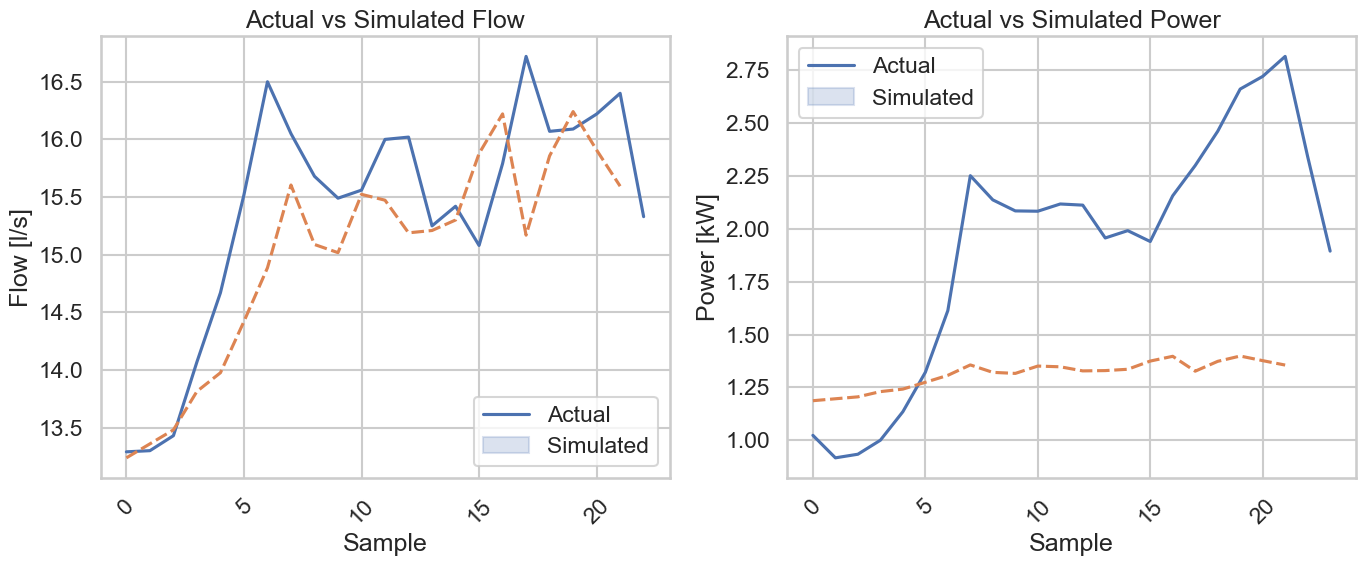

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for clean plots
sns.set(style="whitegrid", context="talk")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Actual vs Simulated Flow
sns.lineplot(ax=axes[0], data=VE_nedri_df[["VE_nedri_actual_flow", "VE_nedri_simulated_flow"]])
axes[0].set_title("Actual vs Simulated Flow")
axes[0].set_xlabel("Sample")
axes[0].set_ylabel("Flow [l/s]")
axes[0].legend(["Actual", "Simulated"])
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Actual vs Simulated Power
sns.lineplot(ax=axes[1], data=VE_nedri_df[["VE_nedri_actual_power", "VE_nedri_simulated_power"]])
axes[1].set_title("Actual vs Simulated Power")
axes[1].set_xlabel("Sample")
axes[1].set_ylabel("Power [kW]")
axes[1].legend(["Actual", "Simulated"])
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show
plt.tight_layout()
plt.show()
